# CS2545 - MINI PROJECT

## CS2545 - Data Science ###
### Winter, 2025 ###
### UNB, Fredericton ###

## Authors: 
<li> Manav Maheshwari (3759768) </li>
<li> Reyaansh Vohra (3758608)</li>

## Importing Libraries


In [12]:
import pandas as pd
import matplotlib as plt


## Loading the Datasets

In [13]:

#Vancouver related datasets
vancouver_datasets = pd.read_csv("../datasets/Vancouver_all_crimes.csv")
vancouver_population_raw = pd.read_csv("../datasets/Vancouver_population.csv", delimiter = ';')

#Toronto related datasets
tor_assault_datasets = pd.read_csv("../datasets/Toronto_Assaults.csv")
tor_break_and_enter = pd.read_csv("../datasets/Toronto_break_and_enter.csv")
tor_homicides = pd.read_csv("../datasets/Toronto_Homicides.csv")
toronto_population_raw = pd.read_csv("../datasets/Toronto_Population.csv", delimiter = ';')


## Data Cleaning

### Cleaning of Toronto Population Dataset

In [14]:
year_raw = toronto_population_raw.iloc[8, 0]
population_raw = toronto_population_raw.iloc[10, 0]
#Cleaning the data
year = [int(year.replace('"', '').strip()) for year in year_raw.split(',')[1:]]
population = [int(population.replace('"', '').strip()) for population in population_raw.split(',')[2:]]
#printing it as a dataframe
toronto_population = pd.DataFrame({"Year": year, "Population": population})
toronto_population

,Year,Population
0,2014,5998737
1,2015,6045240
2,2016,6125013
3,2017,6217328
4,2018,6337780
5,2019,6462898
6,2020,6543886
7,2021,6547381
8,2022,6685621


### Cleaning of Vancouver Population Dataset

In [15]:
year_raw = vancouver_population_raw.iloc[8, 0]
population_raw = vancouver_population_raw.iloc[10, 0]
#Cleaning the data
year = [int(year.replace('"', '').strip()) for year in year_raw.split(',')[1:]]
population = [int(population.replace('"', '').strip()) for population in population_raw.split(',')[2:]]
#printing it as a dataframe
vancouver_population = pd.DataFrame({"Year": year, "Population": population})
vancouver_population

,Year,Population
0,2014,2507414
1,2015,2544484
2,2016,2582202
3,2017,2616904
4,2018,2658582
5,2019,2709277
6,2020,2743765
7,2021,2764932
8,2022,2842730


### Cleaning of Vancouver Crime Dataset

In [16]:
vd = vancouver_datasets.sort_values(by = 'YEAR', ascending=True)
sorted_values = ['Offence Against a Person', 'Homicide', 'Break and Enter Commercial', 'Break and Enter Residential/Other']

vd['CRIMES'] = vd['TYPE']
vancouver_dataset = vd[vd['CRIMES'].isin(sorted_values)][['CRIMES', 'YEAR', 'NEIGHBOURHOOD']]

vancouver_dataset = vancouver_dataset[(vancouver_dataset['YEAR'] > 2013) & (vancouver_dataset['YEAR'] < 2025)]

vancouver_dataset['CRIMES'] = vancouver_dataset['CRIMES'].replace({
    'Break and Enter Commercial': 'Break and Enter',
    'Break and Enter Residential/Other': 'Break and Enter',
    'Offence Against a Person' : 'Assault'
})


vancouver_dataset


,CRIMES,YEAR,NEIGHBOURHOOD
4,Break and Enter,2014,West End
22,Break and Enter,2014,West End
12,Break and Enter,2014,West End
13,Break and Enter,2014,West End
163,Break and Enter,2014,Central Business District
...,...,...,...
267824,Assault,2024,Central Business District
267823,Assault,2024,Central Business District
45165,Break and Enter,2024,Marpole
267820,Assault,2024,Central Business District


### Cleaning of Toronto Crime Dataset

In [17]:
import pandas as pd
#fulfilling the first merge successfully
toronto_first_merge = pd.concat([tor_assault_datasets, tor_break_and_enter], axis=0)
toronto_first_merge['MERGED_CRIMES'] = toronto_first_merge['MCI_CATEGORY'].combine_first(toronto_first_merge['OFFENCE'])
toronto_first_clean = toronto_first_merge.drop(columns = ['MCI_CATEGORY', 'OFFENCE'])

toronto_first_clean.dropna()
#the second cleaning with toronto_homicides
toronto_second_merge = pd.concat([toronto_first_clean, tor_homicides], axis = 0)
toronto_second_merge['CRIMES'] = toronto_second_merge['MERGED_CRIMES'].combine_first(toronto_second_merge['HOMICIDE_TYPE'])


toronto_dataset = toronto_second_merge.drop(columns= ['MERGED_CRIMES', 'HOMICIDE_TYPE'])
toronto_dataset['NEIGHBOURHOOD'] = toronto_dataset['NEIGHBOURHOOD_158']
toronto_dataset['YEAR'] = toronto_dataset['OCC_YEAR'].fillna(0).astype(int)

toronto_dataset['CRIMES'] = toronto_dataset['CRIMES'].replace({
    'Shooting': 'Homicide',
    'Stabbing': 'Homicide',
})

toronto_dataset = toronto_dataset[~toronto_dataset['CRIMES'].isin(['Other'])]
toronto_dataset = toronto_dataset[(toronto_dataset['YEAR'] > 2013) & (toronto_dataset['YEAR'] < 2025)]

toronto_dataset = toronto_dataset[['CRIMES', 'YEAR', 'NEIGHBOURHOOD']].dropna()
toronto_dataset


,CRIMES,YEAR,NEIGHBOURHOOD
0,Assault,2014,Corso Italia-Davenport (92)
1,Assault,2014,Lawrence Park North (105)
2,Assault,2014,Palmerston-Little Italy (80)
4,Assault,2014,West Rouge (143)
5,Assault,2014,West Rouge (143)
...,...,...,...
1476,Homicide,2024,Blake-Jones (69)
1477,Homicide,2024,Englemount-Lawrence (32)
1478,Homicide,2024,Scarborough Village (139)
1479,Homicide,2024,Corso Italia-Davenport (92)


## DATA PROCESSING SECTION

### Analyzing crime rates across different cities of Canada.

#### Total Crime Count Per Year For Toronto

In [18]:
toronto_crime_per_year = toronto_dataset.groupby('YEAR').size()

toronto_crime_per_year = toronto_crime_per_year.reset_index(name = 'Crime Count of Toronto')

toronto_crime = toronto_crime_per_year[toronto_crime_per_year['YEAR'] < 2023]
toronto_crime



,YEAR,Crime Count of Toronto
0,2014,24131
1,2015,25155
2,2016,25558
3,2017,26684
4,2018,27802
5,2019,29752
6,2020,25477
7,2021,24956
8,2022,27471


<h4> Total Crime Count Per Year For Vancouver </h4>

In [19]:
vancouver_crime_per_year = vancouver_dataset.groupby('YEAR').size()

vancouver_crime_per_year = vancouver_crime_per_year.reset_index(name = 'Crime Count of Vancouver')

vancouver_crime = vancouver_crime_per_year[vancouver_crime_per_year['YEAR'] < 2023]

vancouver_crime

,YEAR,Crime Count of Vancouver
0,2014,8421
1,2015,8775
2,2016,8881
3,2017,7845
4,2018,7503
5,2019,8240
6,2020,8647
7,2021,7374
8,2022,7213


#### Crime Rate Analysis

#### Toronto

In [21]:
#to merge the crime data with population data
toronto_crime_rate= pd.concat([toronto_crime, toronto_population], axis = 1).fillna(0).astype(int)

toronto_crime_rate["Crime Rate"] = (toronto_crime_rate["Crime Count of Toronto"] / toronto_crime_rate["Population"]) * 100000
#Year is the same and having two of them is redundant.
toronto_analysis = toronto_crime_rate[['YEAR', 'Crime Rate']]

toronto_analysis

,YEAR,Crime Rate
0,2014,402.268011
1,2015,416.112512
2,2016,417.272584
3,2017,429.187587
4,2018,438.670954
5,2019,460.350759
6,2020,389.325242
7,2021,381.160039
8,2022,410.896759


#### Vancouver

In [ ]:
vancouver_crime_rate = pd.concat([vancouver_crime, vancouver_population], axis = 1).fillna(0).astype(int)

vancouver_crime_rate["Crime Rate"] = (vancouver_crime_rate["Crime Count of Vancouver"] / vancouver_crime_rate["Population"]) * 100000
#Year is the same and having two of them is redundant.
vancouver_analysis = vancouver_crime_rate[['YEAR', 'Crime Rate']]

vancouver_analysis

,YEAR,Crime Rate
0,2014,335.844021
1,2015,344.863634
2,2016,343.931265
3,2017,299.781727
4,2018,282.218115
5,2019,304.140182
6,2020,315.150897
7,2021,266.697336
8,2022,253.734966


#### Visualization

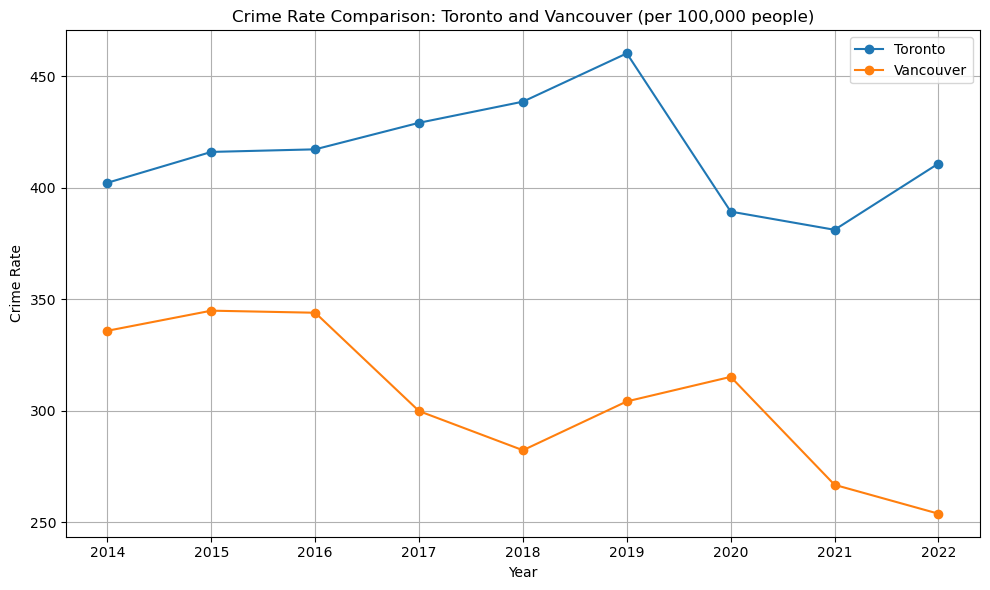

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(toronto_crime_rate["Year"], toronto_crime_rate["Crime Rate"], label="Toronto", marker="o")
plt.plot(vancouver_crime_rate["Year"], vancouver_crime_rate["Crime Rate"], label="Vancouver", marker="o")
plt.title("Crime Rate Comparison: Toronto and Vancouver (per 100,000 people)")
plt.xlabel("Year")
plt.ylabel("Crime Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Visualize trends over time for various types of crime

#### Vancouver

<Figure size 1400x800 with 0 Axes>

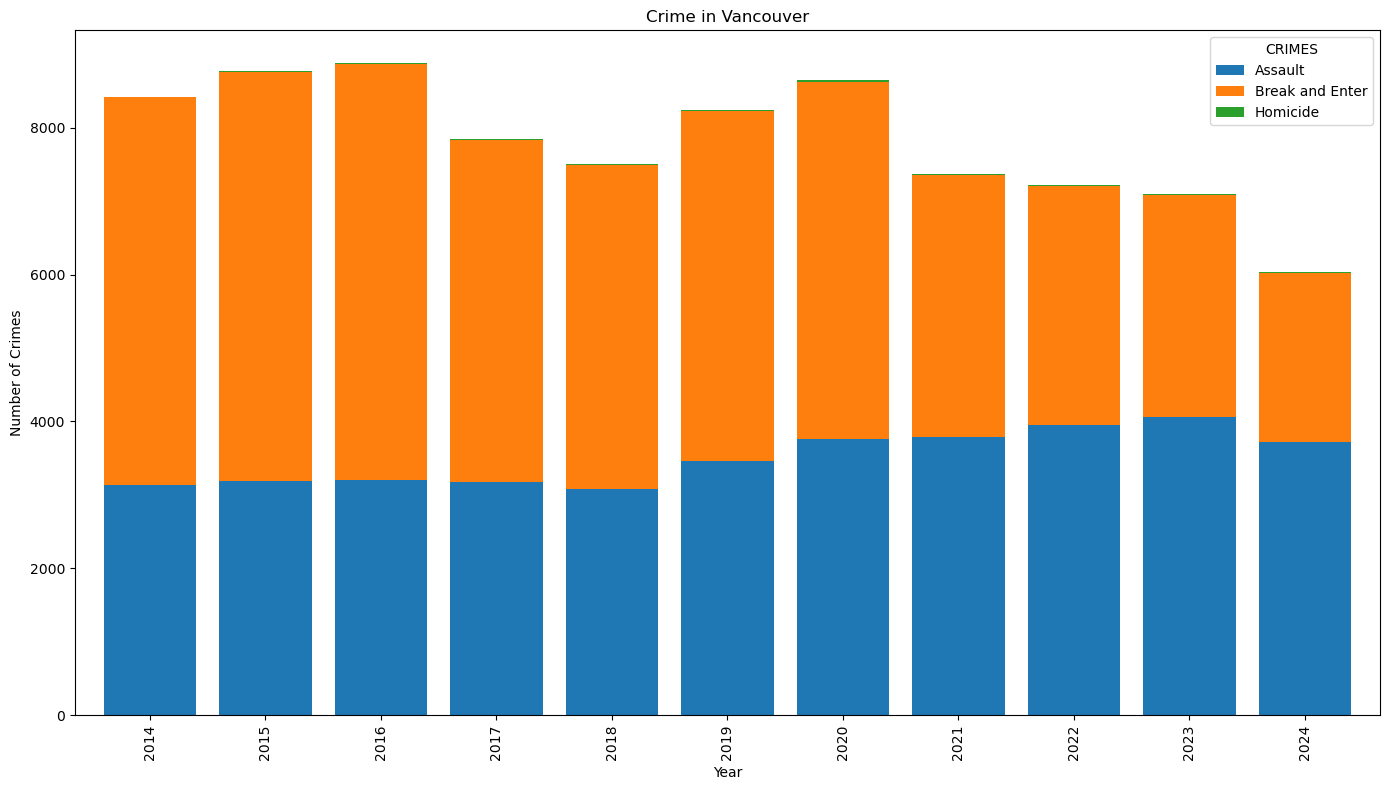

In [ ]:

# Group by year and crime type
vd_grouped = vancouver_dataset.groupby(['YEAR', 'CRIMES']).size().unstack().fillna(0)

# Plot Vancouver crime data
plt.figure(figsize=(14, 8))
vd_grouped.plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8)
plt.title('Crime in Vancouver')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show(block = True)



#### Toronto

<Figure size 1400x800 with 0 Axes>

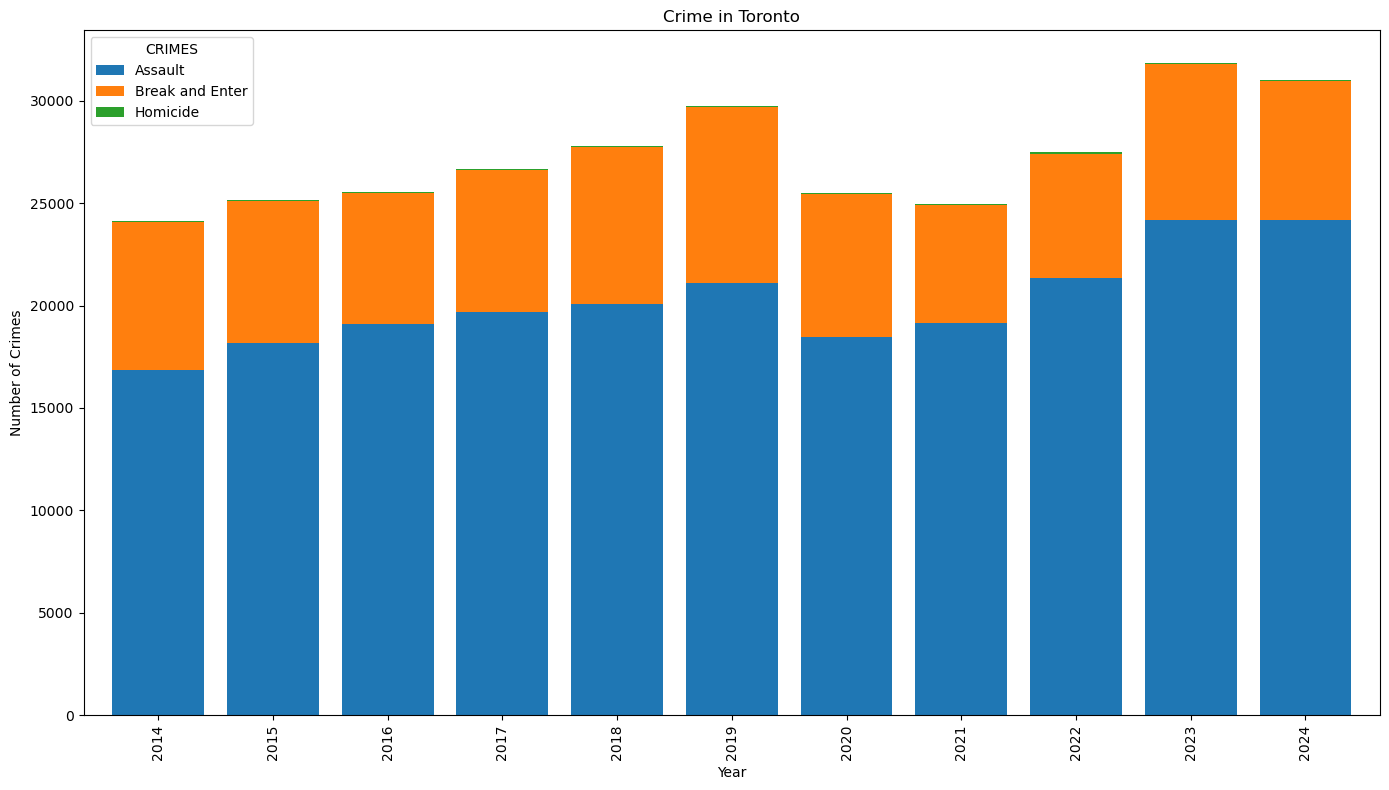

In [ ]:


toronto_grouped = toronto_dataset.groupby(['YEAR', 'CRIMES']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
toronto_grouped.plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8)
plt.title('Crime in Toronto')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()


### Analysis to identify regions with higher or lower crime rates

#### Toronto

In [ ]:
def zone(neighbourhood):
    if any(keyword in neighbourhood for keyword in ['Agincourt', 'Malvern', 'Bendale', 'Birchcliffe', 'Scarborough', 'Cliffside']):
        return 'Scarborough'
    elif any(keyword in neighbourhood for keyword in ['Alderwood', 'Humber', 'Rexdale', 'Islington', 'Etobicoke', 'Kingsview']):
        return 'Etobicoke'
    elif any(keyword in neighbourhood for keyword in ['Bathurst', 'Bayview', 'Don Mills', 'York Mills', 'Downsview', 'North York']):
        return 'North York'
    elif any(keyword in neighbourhood for keyword in ['Annex', 'Church-Wellesley', 'Bay-Cloverhill', 'Cabbagetown', 'Kensington', 'Downtown']):
        return 'Downtown'
    elif any(keyword in neighbourhood for keyword in ['Broadview', 'Danforth', 'Leaside', 'East York', 'Coxwell']):
        return 'East York'
    else:
        return 'Other'

toronto_dataset['ZONE'] = toronto_dataset['NEIGHBOURHOOD'].apply(zone)

toronto_crime_by_zone = toronto_dataset.groupby(['ZONE', 'CRIMES']).size().unstack().fillna(0).astype(int)

toronto_crime_by_zone



CRIMES,Assault,Break and Enter,Homicide
ZONE,,,
Downtown,19969,6769,29
East York,7644,3038,24
Etobicoke,15021,6128,76
North York,5084,2779,12
Other,162703,54745,442
Scarborough,11872,3472,34


#### Vancouver

In [ ]:
def vancouver_zone(neighbourhood):
    if neighbourhood in ['Central Business District', 'West End', 'Stanley Park']:
        return 'Downtown'
    elif neighbourhood in ['Kitsilano', 'Dunbar-Southlands', 'Arbutus Ridge', 'Shaughnessy', 'Kerrisdale', 'West Point Grey']:
        return 'West Side'
    elif neighbourhood in ['Grandview-Woodland', 'Hastings-Sunrise', 'Renfrew-Collingwood', 'Strathcona', 'Kensington-Cedar Cottage']:
        return 'East Vancouver'
    elif neighbourhood in ['Sunset', 'Victoria-Fraserview', 'Marpole', 'Killarney', 'Oakridge', 'South Cambie', 'Musqueam']:
        return 'South Vancouver'
    else:
        return 'Other'
    
vancouver_dataset.loc[:, 'ZONE'] = vancouver_dataset['NEIGHBOURHOOD'].apply(vancouver_zone)

vancouver_filtered = vancouver_dataset[['CRIMES', 'YEAR', 'ZONE']]

vancouver_crime_by_zone = vancouver_filtered.groupby(['ZONE', 'CRIMES']).size().unstack().fillna(0).astype(int)

vancouver_crime_by_zone



CRIMES,Assault,Break and Enter,Homicide
ZONE,,,
Downtown,17836,11665,54
East Vancouver,12166,12119,54
Other,3280,8220,13
South Vancouver,3577,7281,25
West Side,1664,8069,9


#### Visualizing Toronto's Crimes Based On Zones 

<Figure size 1400x800 with 0 Axes>

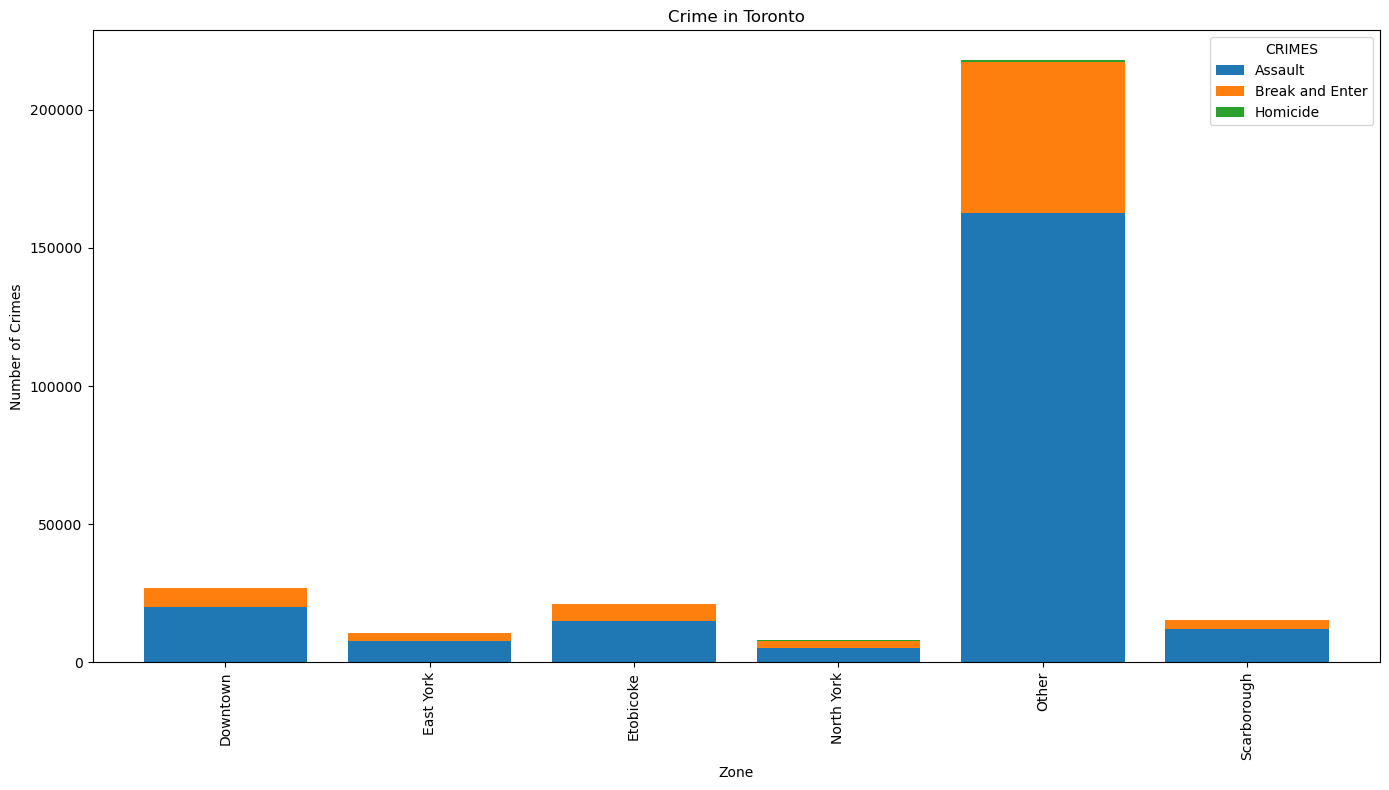

In [ ]:
toronto_dataset['ZONE'] = toronto_dataset['NEIGHBOURHOOD'].apply(zone)
toronto_dataset['ZONE'] = toronto_dataset['NEIGHBOURHOOD'].apply(zone)
toronto_crime_by_zone = toronto_dataset.groupby(['ZONE', 'CRIMES']).size().unstack().fillna(0).astype(int)

plt.figure(figsize=(14, 8))
toronto_crime_by_zone.plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8)
plt.title('Crime in Toronto')
plt.xlabel('Zone')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

#### Visualizing Vancouver's Crimes Based On Zones

<Figure size 1400x800 with 0 Axes>

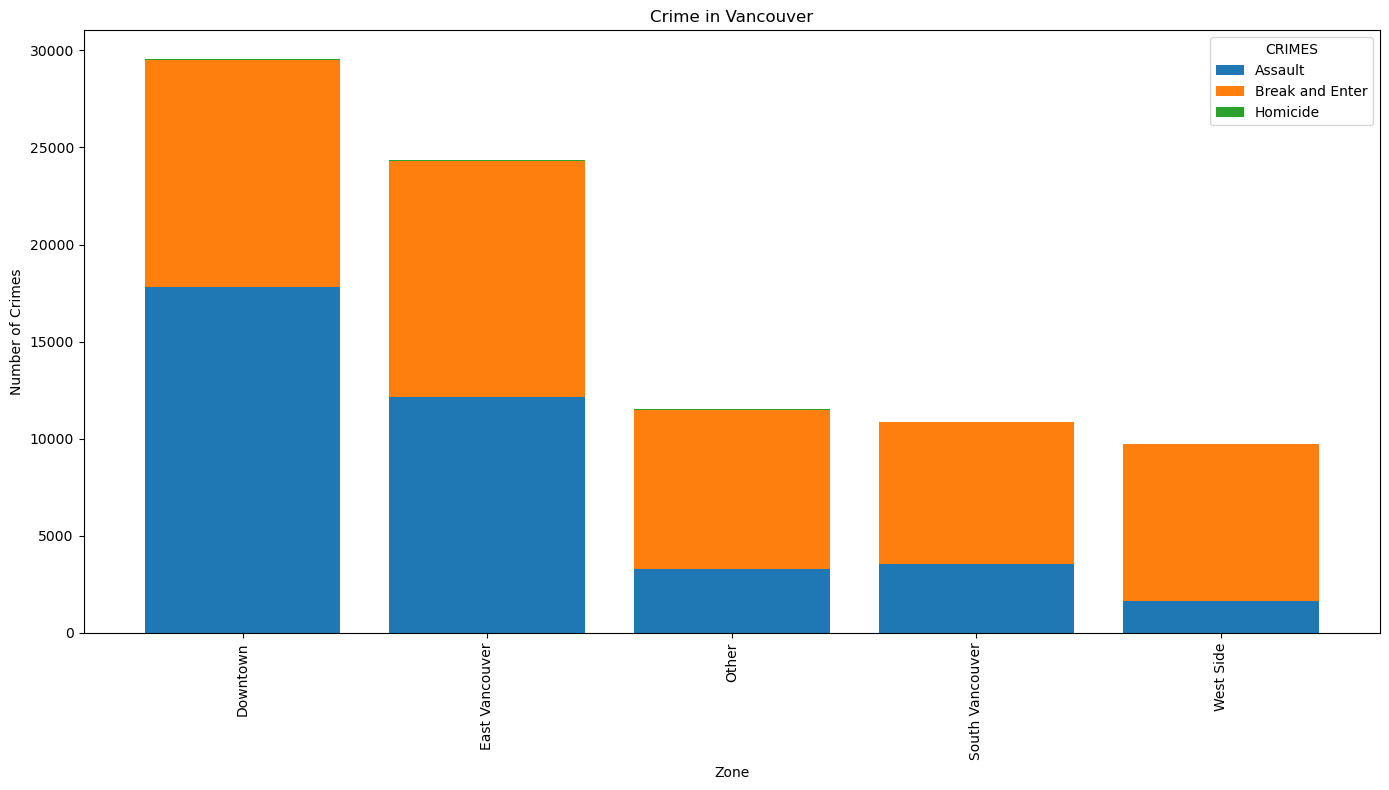

In [ ]:
vancouver_dataset.loc[:, 'ZONE'] = vancouver_dataset['NEIGHBOURHOOD'].apply(vancouver_zone)

vancouver_filtered = vancouver_dataset[['CRIMES', 'YEAR', 'ZONE']]

vancouver_crime_by_zone = vancouver_filtered.groupby(['ZONE', 'CRIMES']).size().unstack().fillna(0).astype(int)
plt.figure(figsize=(14, 8))
vancouver_crime_by_zone.plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8)
plt.title('Crime in Vancouver')
plt.xlabel('Zone')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

### Compare crime rates with socioeconomic factors such as income levels or education